# Desempenho do Brasil nas Olimpiadas ao Longo dos Anos Até 2016.

# Introdução

As Olimpíadas, ou Jogos Olímpicos, são um dos maiores eventos esportivos do mundo, onde atletas de diferentes países se reúnem a cada quatro anos para competir em diversas modalidades. Durante algumas semanas, assistimos a performances incríveis, recordes sendo quebrados e histórias emocionantes de superação. Desde a primeira edição, o evento se tornou um símbolo de união e diversidade, trazendo esportes tradicionais e novas modalidades para os holofotes. Cada edição tem sua própria magia, seja pela cidade-sede, pelo espírito esportivo ou pelos momentos inesquecíveis que ficam marcados na história.

## Sobre o cojunto de dados.

- Fonte: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download


- Descrição: 120 anos de história olímpica: atletas e resultados até o ano de 2016

## Motivação

Minha ideia aqui é colocar em prática um pouco do que aprendi até agora. E como estamos no clima das Olimpíadas, por que não fazer uma breve e simples análise de dados sobre o evento? Assim, a gente aproveita ainda mais esse espírito esportivo que as Olimpíadas trazem e, de quebra, explora algumas curiosidades sobre os dados!

## Dicionário de dados

**Dicionário de dados:**

arquivo: atlhete_events.csv:

- ID - Número único para cada atleta
- Nome - Nome do atleta
- Sexo - M ou F
- Idade - Inteiro
- Altura - Em centímetros
- Peso - Em quilogramas
- Equipe - Nome da equipe
- NOC - Código de 3 letras do Comitê Olímpico Nacional
- Jogos - Ano e estação
- Ano - Inteiro
- Estação - Verão ou Inverno
- Cidade - Cidade anfitriã (cidade onde os Jogos Olímpicos foram realizados)
- Esporte - Esporte
- Evento - Evento
- Medalha - Ouro, Prata, Bronze ou NA

arquivo: noc_regions.csv

- NOC (Código de 3 letras do Comitê Olímpico Nacional)
- Nome do país (corresponde às regiões em map_data("world"))
- Notas

# Projeto

## **Definição do problema**

O objetivo deste projeto é analisar o desempenho do Brasil ao longo dos anos nas Olimpíadas, utilizando apenas dados relacionados aos atletas e conquistas brasileiras. Vamos explorar como o Brasil tem se saído nas competições, em quais modalidades o país se destaca e como seu desempenho evoluiu ao longo do tempo. Para isso, responderemos algumas perguntas com gráficos e códigos que trazem à tona o espírito olímpico brasileiro.

Vamos responder algumas perguntas. . .

## Bibliotecas

In [1]:
# Pacotes
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Carga dos dados


In [2]:
# Carregando os dados
df = pd.read_csv ('athlete_events.csv')

In [3]:
# Carregando o segundo arquivo
region_df = pd.read_csv('noc_regions.csv')


Neste dataset cada registro contém o código NOC, o país ou região correspondente e uma observação indicando se essa área já teve outro nome. Embora, normalmente, cada país ou região tenha um único NOC, existem algumas exceções causadas por motivos históricos, políticos ou territoriais. Um exemplo disso é a Alemanha, que após a Segunda Guerra Mundial foi dividida em Alemanha Oriental (República Democrática Alemã) e Alemanha Ocidental (República Federal da Alemanha), cada uma com seu próprio NOC, competindo de forma separada nas Olimpíadas até a reunificação em 1990.

#### Vamos conhecer um pouco os dados

In [4]:
#Visualizando os dados  
display(df)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
#Dimensaão dos dados   
df.shape

(271116, 15)

In [6]:
#Visualizando os dados
region_df.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
region_df.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [8]:
#Dimesnão dos dados
region_df.shape

(230, 3)

## Data Wrangling

### Limpeza

- Dados ausentes (espaços em braco, caracteres especiais, etc)

- NA's

In [9]:
#Verificando se há valores ausentes 
print(region_df.isnull().sum())

NOC         0
region      3
notes     209
dtype: int64


In [10]:
#Verificando se há valores ausentes
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [11]:
# Verificar a porcentagem de cada coluna contendo valores nulos.

percentual_nulos = df.isnull().mean() * 100
percentual_nulos

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
dtype: float64

> As colunas 'Height' e 'weight'não serão relevantes para este projeto.

> Podemos perceber que na variável 'Medal' há 80% de valores NA na coluna, que é categórica. Esses valores NA representam atletas que não ganharam medalhas.

> Em relação à coluna 'Age', vamos substituir os valores ausentes pela média.

In [12]:
# Tratamento dos valores nulos 
mean_agevalue = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_agevalue)

- Duplicados

In [13]:
#verificando dataframe region
region_dup = region_df[region_df.duplicated(keep=False)]
region_dup

,NOC,region,notes


In [14]:
#Verificando dataframe atlhetc
df_dup = df[df.duplicated(keep=False)]
df_dup

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4281,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270199,135173,Henri Achille Zo,M,58.0,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [15]:
# Total de linhas duplicadas
df_total_dup =  df.duplicated().sum()
df_total_dup

1385

#### Removendo as duplicatas

In [16]:
#Removendo linhas duplicadas
df = df.drop_duplicates()

In [17]:
# Verificar as entradas com ano igual a 1900
entradas_1900 = df[(df['NOC'] == 'BRA') & (df['Year'] == 1920)]
entradas_1900

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6044,3399,Orlando Amndola,M,25.556898,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Water Polo,Water Polo Men's Water Polo,NaN
6045,3399,Orlando Amndola,M,25.556898,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 100 metres Freestyle,NaN
14408,7767,Dario Barbosa,M,37.000000,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN
14409,7767,Dario Barbosa,M,37.000000,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
40656,20948,"Victorino ""Chocolate"" Ramos Fernandes",M,25.556898,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Water Polo,Water Polo Men's Water Polo,NaN
47792,24637,Afrnio Antnio da Costa,M,28.000000,178.0,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres",Silver
47793,24637,Afrnio Antnio da Costa,M,28.000000,178.0,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Free Pistol, 50 metres, Team",Bronze
70558,35925,Ernesto Flores Filho,M,25.556898,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Rowing,Rowing Men's Coxed Fours,NaN
75345,38247,ngelo Gammaro,M,24.000000,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Water Polo,Water Polo Men's Water Polo,NaN
75346,38247,ngelo Gammaro,M,24.000000,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 100 metres Freestyle,NaN


### MERGE 

Aqui, vamos unir as tabelas para análise.

In [18]:
#todos os dados da esquerda com a identificação 'NOC' entre ambas tabelas
dados = pd.merge(df, region_df, on='NOC', how='left') 

In [19]:
dados.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [20]:
#Dimensão total do dataframe
dados.shape

(269731, 17)

### Pré-Processamento 

In [21]:
# Verificar tipo de dados das variáveis.
dados.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
 15  region  269361 non-null  object 
 16  notes   5035 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.0+ MB


In [22]:
# Converter a variável Year para inteiro

dados["Year"] = dados['Year'].astype(int)
dados["Age"] = dados['Age'].round().astype(int)

## Análise exploratória

### Bussiness Inteligence


In [23]:
# Formatar a saída dos valores 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [24]:
# Analise estatistica das colunas númericas
dados.describe()

,ID,Age,Height,Weight,Year
count,269731.00,269731.00,210917.00,208204.00,269731.00
mean,68264.95,25.47,175.34,70.70,1978.62
std,39026.25,6.06,10.52,14.35,29.75
min,1.00,10.00,127.00,25.00,1896.00
25%,34655.50,22.00,168.00,60.00,1960.00
50%,68233.00,25.00,175.00,70.00,1988.00
75%,102111.00,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


### 1. Inicio da participação do Brasil nos jogos olimpicos

In [25]:
# Filtrar os dados do Brasil
dados_brasil = dados[dados['Team'] == 'Brazil']
dados_brasil

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
665,386,Alexandre Abeid,M,22,194.00,92.00,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
666,386,Alexandre Abeid,M,26,194.00,92.00,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN,Brazil,NaN
668,388,Abel Carlos da Silva Braga,M,19,190.00,73.00,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,Brazil,NaN
781,451,Diana Monteiro Abla,F,21,175.00,75.00,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN,Brazil,NaN
1005,565,Glauclio Serro Abreu,M,26,185.00,75.00,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN,Brazil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267273,134400,"Maria Jos ""Zz"" Bertolotti",F,26,190.00,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN,Brazil,NaN
268366,134976,Sieglinda Lenk Zigler,F,17,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN,Brazil,NaN
268520,135037,Moacir Zimmermann,M,32,184.00,70.00,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN,Brazil,NaN
269093,135289,Zzimo Alves Calazans,M,20,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN,Brazil,NaN


In [26]:
# Edições 
dados[dados['NOC'] == 'BRA']['Year'].unique()


array([1972, 1976, 2016, 2004, 1984, 1988, 2012, 1952, 1964, 1980, 1992,
       1996, 2000, 2008, 1936, 1968, 1948, 1956, 1960, 1920, 1932, 1998,
       2002, 2006, 2014, 1924, 2010, 1900, 1994])

In [27]:
# Edição como convido especial

entradas_1900 = dados[(dados['NOC'] == 'BRA') & (dados['Year'] == 1900)]
entradas_1900


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
120571,61291,Adolphe Christiano Klingelhoeffer,M,20,NaN,NaN,Brazil,BRA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 60 metres,NaN,Brazil,NaN
120572,61291,Adolphe Christiano Klingelhoeffer,M,20,NaN,NaN,Brazil,BRA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 200 metres,NaN,Brazil,NaN
120573,61291,Adolphe Christiano Klingelhoeffer,M,20,NaN,NaN,Brazil,BRA,1900 Summer,1900,Summer,Paris,Athletics,Athletics Men's 110 metres Hurdles,NaN,Brazil,NaN


> Segundo algumas pesquisas, o Brasil participou dos Jogos Olímpicos de 1900, realizados em Paris, como um dos países convidados, mas não com uma equipe nacional oficial. Naquela edição, o Brasil foi representado por um atleta, o marinheiro brasileiro Francisco de Paula Machado, que competiu na modalidade de remo. No entanto, o Brasil não enviou uma equipe oficial para os Jogos de 1900, e o país começou a enviar equipes mais organizadas a partir de 1920.    " Olympic.org, e o Sports-Reference"

______

### 2- Número de Medalhas ao Longo dos Anos:

Analise quantas medalhas (ouro, prata e bronze) o Brasil ganhou ao longo das edições dos Jogos Olímpicos.

In [28]:
# Filtrar apenas os dados do Brasil
brasil = dados[dados['NOC'] == 'BRA']

In [29]:
# Remover duplicatas de esportes coletivos (considerando 'Event' para identificar o time e medalha)
brasil = brasil.drop_duplicates(subset=['Year', 'Event', 'Medal'])

In [30]:
# Agrupar e contar as medalhas por ano
unico = brasil.groupby(['Year', 'Medal']).size().unstack().fillna(0)
# Adicionar uma nova coluna 'Total' que é a soma de todas as medalhas por ano
unico['Total'] = unico.sum(axis=1)

unico

Medal,Bronze,Gold,Silver,Total
Year,,,,
1920,1.00,1.00,1.00,3.00
1948,1.00,0.00,0.00,1.00
1952,2.00,1.00,0.00,3.00
1956,0.00,1.00,0.00,1.00
1960,2.00,0.00,0.00,2.00
1964,1.00,0.00,0.00,1.00
1968,2.00,0.00,1.00,3.00
1972,2.00,0.00,0.00,2.00
1976,2.00,0.00,0.00,2.00


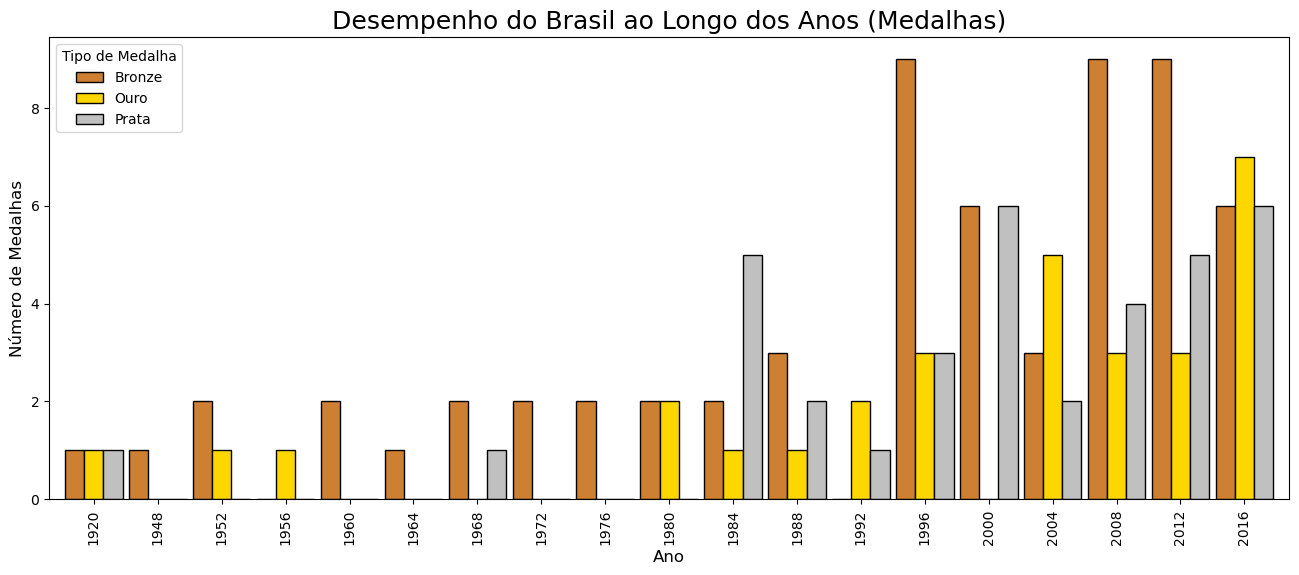

In [31]:
# Gráfico Contagem de medalhas por ano:
unico.drop(columns='Total').plot(kind='bar', figsize=(16,6), edgecolor='black', color=['#cd7f32', '#ffd700', '#c0c0c0'], width=0.9)

# Adicionando título e rótulos
plt.title('Desempenho do Brasil ao Longo dos Anos (Medalhas)', fontsize=18)
plt.ylabel('Número de Medalhas', fontsize=12)
plt.xlabel('Ano', fontsize=12)

# Colocando a legenda em português
plt.legend(title='Tipo de Medalha', labels=['Bronze', 'Ouro', 'Prata']);


>  Em 2016, o Brasil conquistou 6 medalhas de ouro, totalizando 19 medalhas, que é o maior número já conquistado pelo país em uma única edição dos Jogos Olímpicos. Vale lembrar que, neste ano, o Brasil foi o país-sede das Olimpíadas.




In [32]:
# Total de medalhas ao longo do tempo
totais = unico.sum(axis=0)
totais

Medal
Bronze    62.00
Gold      30.00
Silver    36.00
Total    128.00
dtype: float64

In [33]:
type(totais)

pandas.core.series.Series

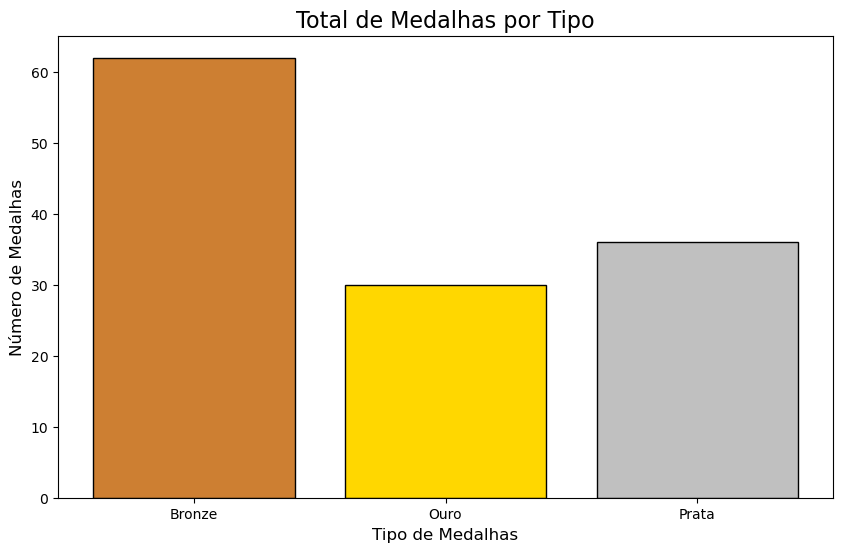

In [34]:
# Gráfico total de medalhas por tipo
plt.figure(figsize=(10, 6))

bars = plt.bar(totais.index[:-1], totais.values[:-1], edgecolor='black', color=['#cd7f32', '#ffd700', '#c0c0c0'])

# Adicionando título e rótulos
plt.title('Total de Medalhas por Tipo', fontsize=16)
plt.ylabel('Número de Medalhas', fontsize=12)
plt.xlabel('Tipo de Medalhas', fontsize=12)

# Adicionar rótulos traduzidos para o eixo x
plt.xticks(
    ticks=[0, 1, 2],  # Posições das barras no eixo x
    labels=['Bronze', 'Ouro', 'Prata']  # Rótulos traduzidos
);



__________________

### 3. Evolução por Tipo de Medalha:

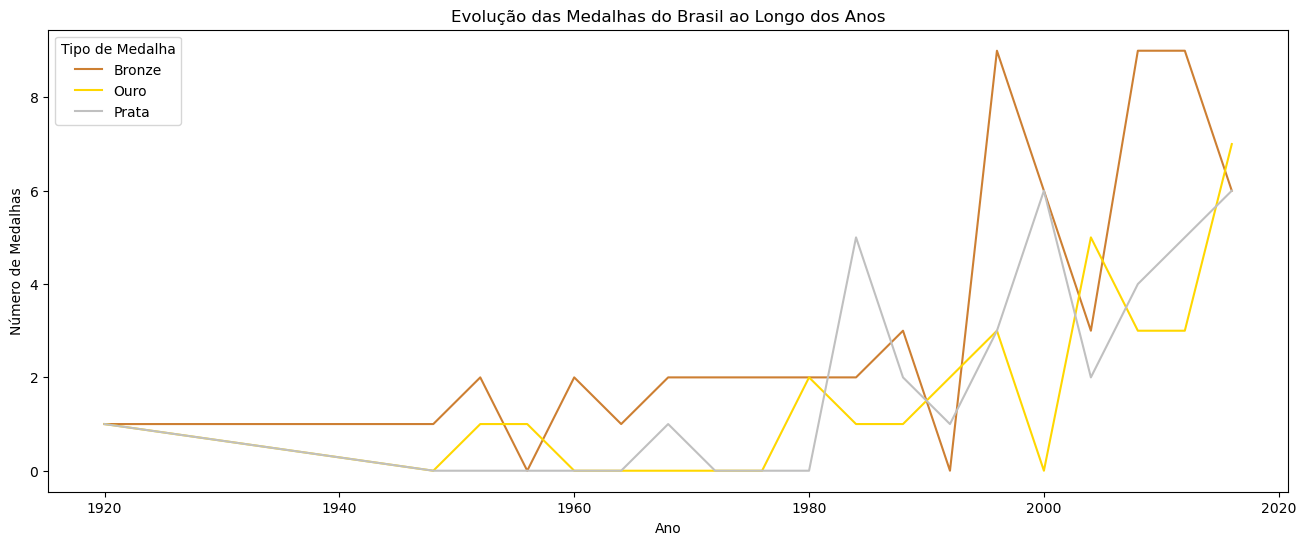

In [35]:
#Gráfico

# Criar gráfico de linha
unico.drop(columns='Total').plot(kind='line', figsize=(16,6), color=['#cd7f32', '#ffd700', '#c0c0c0'])

# Adicionando título e rótulos
plt.title('Evolução das Medalhas do Brasil ao Longo dos Anos')
plt.ylabel('Número de Medalhas')
plt.xlabel('Ano')

# Colocando a legenda em português
plt.legend(title='Tipo de Medalha', labels=['Bronze', 'Ouro', 'Prata'])

# plt.grid(True)

plt.show()

> Podemos observar no gráfico uma evolução no número de medalhas de ouro conquistadas, apesar de uma queda no início dos anos 2000.

______________

### 4. Desempenho em Esportes Específicos:

Aqui temos que fazer um tratamento para esportes que são coletivos

In [36]:
# Filtrar dados do Brasil e remover duplicatas
medalhas_por_esporte = dados[(dados['NOC'] == 'BRA') & (dados['Medal'].notna())] \
    .drop_duplicates(subset=['Year', 'Event', 'NOC', 'Medal']) \
    .groupby(['Event', 'Medal']).size().unstack(fill_value=0)

In [37]:
# Adicionar uma nova coluna 'Total' que é a soma de todas as medalhas por esporte
medalhas_por_esporte['Total'] = medalhas_por_esporte.sum(axis=1)


In [38]:
#visualizando os dados
medalhas_por_esporte

Medal,Bronze,Gold,Silver,Total
Event,,,,
Athletics Men's 200 metres,1,0,0,1
Athletics Men's 4 x 100 metres Relay,2,0,1,3
Athletics Men's 800 metres,0,1,1,2
Athletics Men's High Jump,1,0,0,1
Athletics Men's Marathon,1,0,0,1
...,...,...,...,...
Swimming Women's 10 kilometres Open Water,1,0,0,1
Taekwondo Men's Heavyweight,1,0,0,1
Taekwondo Women's Heavyweight,1,0,0,1


In [39]:
# Ordenar o DataFrame por medadlhas de ouro em ordem decrescente
medalhas_por_esporte_ouro = medalhas_por_esporte.sort_values(by='Gold', ascending=False).head(10)


In [40]:
# 10 esportes que mais conquistaram medalhas de ouro
medalhas_por_esporte_ouro

Medal,Bronze,Gold,Silver,Total
Event,,,,
Volleyball Men's Volleyball,0,3,3,6
Volleyball Women's Volleyball,2,2,0,4
Beach Volleyball Men's Beach Volleyball,1,2,3,6
Athletics Men's Triple Jump,3,2,1,6
Sailing Mixed One Person Dinghy,0,2,1,3
"Shooting Men's Military Pistol, 30 metres",0,1,0,1
Football Men's Football,2,1,3,6
Gymnastics Men's Rings,0,1,1,2
Judo Men's Half-Heavyweight,2,1,1,4


In [41]:
# Dicionário de mapeamento: inglês -> português (apenas os esportes selecionados)
mapa_esportes = {
    "Volleyball Men's Volleyball": 'Vôlei Quadra Masculino',
    "Volleyball Women's Volleyball": 'Vôlei Quadra feminino',
    "Beach Volleyball Men's Beach Volleyball": 'Vôlei Praia Masculino',
    "Athletics Men's Triple Jump": 'Atletismo Salto Triplo Masculino',
    'Sailing Mixed One Person Dinghy': 'Vela Classe Individual Mista',
    "Shooting Men's Military Pistol, 30 metres": 'Tiro Pistola Militar 30m Masculino',
    "Football Men's Football": 'Futebol Masculino',
    "Gymnastics Men's Rings": 'Ginástica Artist Masculino',
    "Judo Men's Half-Heavyweight": 'Judô Meio-Pesado Masculino',
    "Judo Men's Half-Lightweight": 'Judô Meio-Leve Masculino',
    # ADD esportes para grafico total geral:
    "Athletics Men's Long Jump": 'Atletismo Salto em Distância Masculino',
    "Athletics Women's Long Jump": 'Atletismo Salto em Distância Feminino',
    "Beach Volleyball Women's Beach Volleyball": 'Vôlei Praia Feminino',
    "Judo Men's Lightweight" : 'Judô leve Masculino',
    "Swimming Men's 100 metres Freestyle" : 'Natação 100m Livre Masculino',
    "Swimming Men's 50 metres Freestyle" : 'Natação 50m Livre Masculino'
    
}

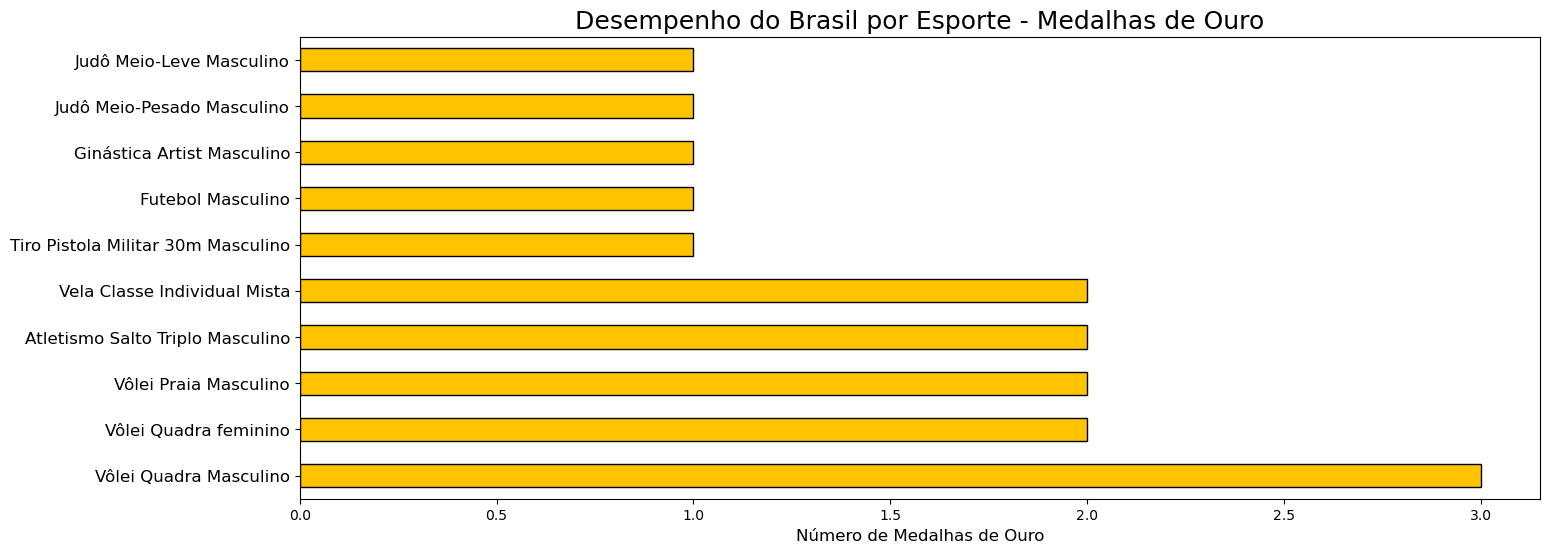

In [42]:
# Filtrar apenas as medalhas de ouro
medalhas_ouro = medalhas_por_esporte_ouro[['Gold']]

# Ordenar os esportes com base no número de medalhas de ouro
# medalhas_ouro = medalhas_ouro.sort_values(by='Gold', ascending=False)

# Gráfico desempenho por esportes (apenas medalhas de ouro)
medalhas_ouro.plot(kind='barh', edgecolor='black', figsize=(16, 6), color='#FFC300', legend=False)  # Cor amarela mais escura

# Adicionando título e rótulos
plt.title('Desempenho do Brasil por Esporte - Medalhas de Ouro', fontsize=18)
plt.xlabel('Número de Medalhas de Ouro', fontsize=12)

# Traduzindo os rótulos dos esportes diretamente no eixo y do gráfico
plt.yticks(ticks=range(len(medalhas_ouro.index)), 
           labels=[mapa_esportes.get(esporte, esporte) for esporte in medalhas_ouro.index], 
           fontsize=12)

# Remover o nome do eixo y
plt.ylabel('');  # Deixa o eixo y sem rótulo

> Até 2016, o Vôlei de Quadra Masculino foi a modalidade que conquistou mais medalhas de ouro.

**Total Geral de Medalhas**

In [44]:
# Ordenar o DataFrame por medadlhas de ouro em ordem decrescente
medalhas_por_esporte_total = medalhas_por_esporte.sort_values(by='Total', ascending=False).head(10)

In [45]:
medalhas_por_esporte_total

Medal,Bronze,Gold,Silver,Total
Event,,,,
Beach Volleyball Women's Beach Volleyball,2,1,4,7
Beach Volleyball Men's Beach Volleyball,1,2,3,6
Volleyball Men's Volleyball,0,3,3,6
Football Men's Football,2,1,3,6
Athletics Men's Triple Jump,3,2,1,6
Judo Men's Lightweight,3,0,1,4
Swimming Men's 100 metres Freestyle,3,0,1,4
Judo Men's Half-Heavyweight,2,1,1,4
Volleyball Women's Volleyball,2,2,0,4


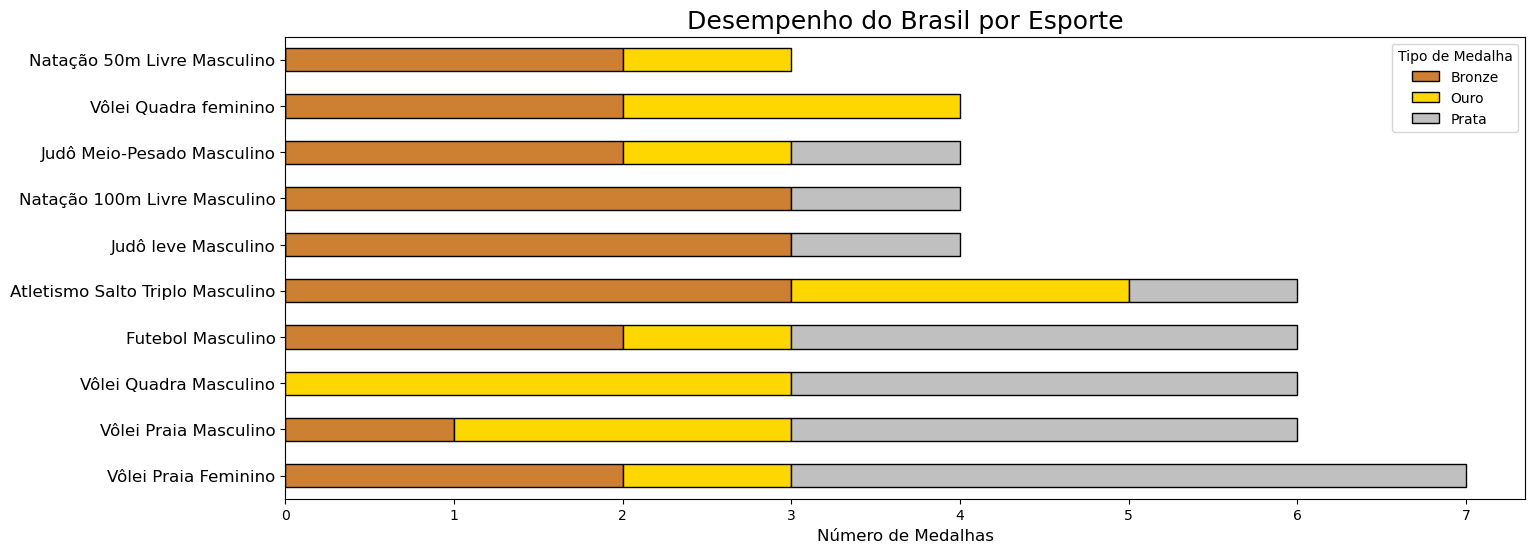

In [46]:
# Gráfico desempenho por esportes
medalhas_por_esporte_total.drop(columns='Total').plot(kind='barh', stacked=True, edgecolor='black', figsize=(16, 6), color=['#cd7f32', '#ffd700', '#c0c0c0'])

# Adicionando título e rótulos
plt.title('Desempenho do Brasil por Esporte', fontsize=18)

plt.xlabel('Número de Medalhas', fontsize=12)

# Traduzindo os rótulos dos esportes diretamente no eixo y do gráfico
plt.yticks(ticks=range(len(medalhas_por_esporte_total.index)), 
           labels=[mapa_esportes.get(esporte, esporte) for esporte in medalhas_por_esporte_total.index], 
           fontsize=12)

# Colocando a legenda em português
plt.legend(title='Tipo de Medalha', labels=['Bronze', 'Ouro', 'Prata'])



# Remover o nome do eixo y
plt.ylabel('');  # Deixa o eixo y sem rótulo

> Até 2016, o Vôlei de Praia Feminino foi a modalidade que conquistou mais medalhas no total.

_________________________________

### 5. Número de Atletas Representando o Brasil ao Longo dos Anos:

In [50]:
# Número de atletas representando o Brasil ao longo dos anos
atletas_por_ano_total = dados[dados['NOC'] == 'BRA'].groupby('Year')['Name'].nunique().sum()
atletas_por_ano_total 

3028

In [57]:
# Total
atletas_por_ano = dados[dados['NOC'] == 'BRA'].groupby('Year')['Name'].nunique()
atletas_por_ano

Year
1900      1
1920     19
1924     12
1932     59
1936     73
1948     70
1952     97
1956     47
1960     72
1964     61
1968     76
1972     81
1976     79
1980    106
1984    147
1988    160
1992    189
1994      1
1996    221
1998      1
2000    198
2002     10
2004    243
2006      9
2008    268
2010      5
2012    248
2014     13
2016    462
Name: Name, dtype: int64

# fazer a soma 

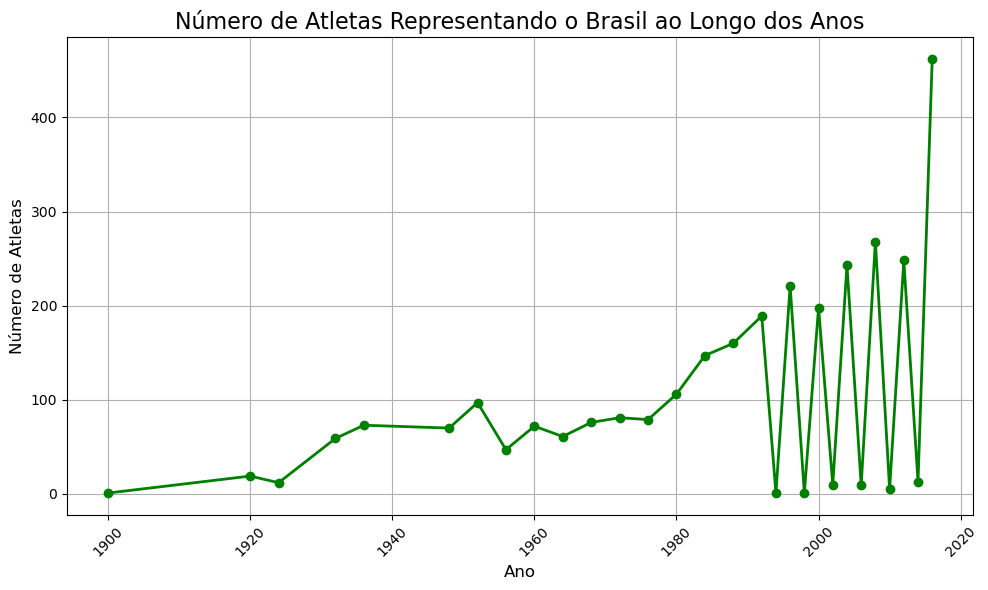

In [48]:
# Criar o gráfico de linhas
plt.figure(figsize=(10,6))
plt.plot(atletas_por_ano.index, atletas_por_ano.values, color='green', marker='o', linestyle='-', linewidth=2)

# Adicionando título e rótulos
plt.title('Número de Atletas Representando o Brasil ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Atletas', fontsize=12)


#  layout
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


> O número de atletas brasileiros nos Jogos Olímpicos aumentou significativamente ao longo do tempo, refletindo o crescimento do esporte no país e a ampliação da participação em diversas modalidades

________________

**Atletas**

### 6. Número de Atletas por gênero:

In [58]:
# Número de participantes por gênero nas olimpiadas
atletas_gen = dados[(dados.NOC == 'BRA')].groupby('Sex').size()
atletas_gen

Sex
F    1148
M    2700
dtype: int64

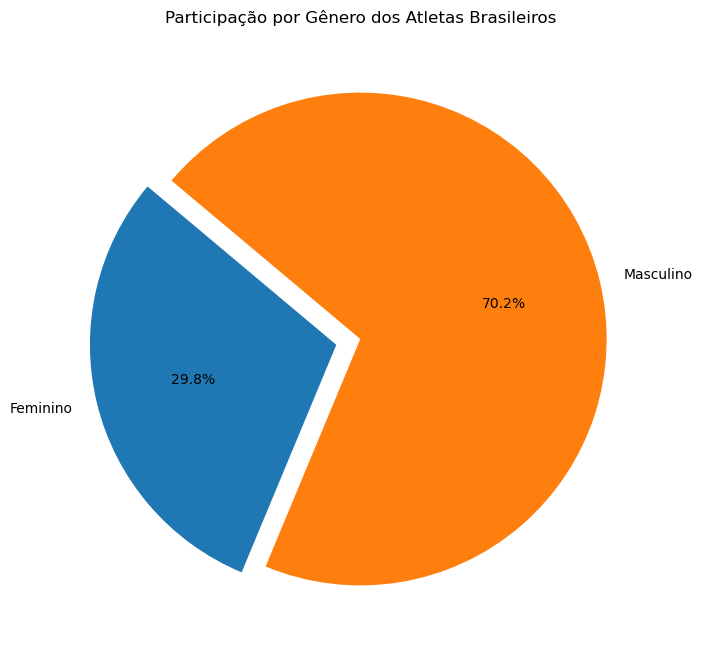

In [59]:
# Dados para o gráfico
labels = ['Masculino' if Sex == 'M' else 'Feminino' for Sex in atletas_gen.index]
sizes = atletas_gen.values
colors = ['#1F77B4', '#FF7F0E']  # Cores para o gráfico
explode = (0.1, 0)  # Destacar a primeira fatia (homens) com um pedaço destacado

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Participação por Gênero dos Atletas Brasileiros')
plt.show()

> É claro, que a participação de atletas masculinos é superior à de atletas femininas.

brasil.groupby('Sex')['ID'].count()

_____________

### 7. Número de Medalhas por Gênero ao Longo dos Anos:

In [60]:
# Contagem de medalhas por gênero e ano
medalhas_gen = dados[(dados.NOC == 'BRA') & (dados.Medal.notnull())].groupby(['Year', 'Sex', 'Medal']).size().unstack().fillna(0)
medalhas_gen

,Medal,Bronze,Gold,Silver
Year,Sex,,,
1920,M,5.00,1.00,1.00
1948,M,10.00,0.00,0.00
1952,M,2.00,1.00,0.00
1956,M,0.00,1.00,0.00
1960,M,13.00,0.00,0.00
1964,M,12.00,0.00,0.00
1968,M,3.00,0.00,1.00
1972,M,2.00,0.00,0.00
1976,M,3.00,0.00,0.00


In [61]:
type(medalhas_gen)

pandas.core.frame.DataFrame

In [62]:
# .xs() do Pandas, que é usado para "cortar" ou "selecionar"
# vamos usar essa função, pois, o dataframe possui um MultiIndex, ou seja, o índice está 
# composto de mais de um nível (neste caso, provavelmente Year e Sex).

medalhas_homens = medalhas_gen.xs('M', level='Sex')
medalhas_mulheres = medalhas_gen.xs('F', level='Sex')

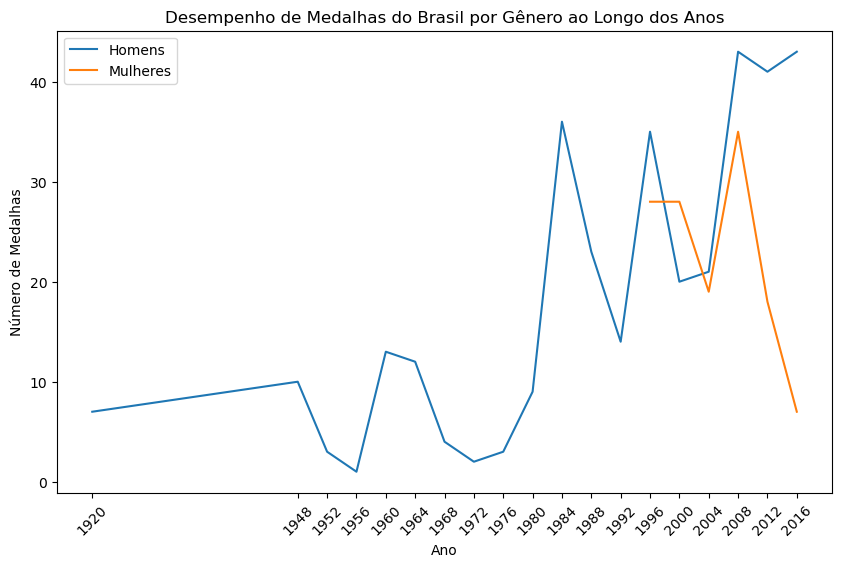

In [63]:
# Gráfico comparativo
plt.figure(figsize=(10,6))
medalhas_homens.sum(axis=1).plot(label='Homens', color = '#1F77B4')
medalhas_mulheres.sum(axis=1).plot(label='Mulheres', color = '#FF7F0E')
plt.title('Desempenho de Medalhas do Brasil por Gênero ao Longo dos Anos')
plt.ylabel('Número de Medalhas')
plt.xlabel('Ano')
plt.legend()


# Ajustar os anos no eixo X
anos = medalhas_homens.index  # Supondo que o índice seja o ano
plt.xticks(ticks=anos, labels=anos, rotation=45);

>  Apesar da participação das mulheres ser muito inferior à dos homens, elas conseguiram feitos históricos, como a primeira medalha de ouro em 1996.

> A primeira medalha de ouro conquistada por um homem brasileiro foi em 1920, na modalidade de tiro. Na época, o formato da competição consistia em 30 tiros divididos em 5 séries de 6 tiros cada. Guilherme Paraense foi o responsável por conquistar a primeira medalha de ouro da delegação brasileira.

In [64]:
# Primeira medalha para mulheres
dados[(dados.NOC == 'BRA') & (dados.Medal == 'Gold') & (dados.Sex == 'F') & (dados.Year == dados[(dados.NOC == 'BRA') & (dados.Medal == 'Gold') & (dados.Sex == 'F')]['Year'].min())]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
208771,105385,Sandra Tavares Pires Nascimento,F,23,174.00,64.00,Brazil-1,BRA,1996 Summer,1996,Summer,Atlanta,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Gold,Brazil,NaN
218873,110521,"Jacqueline Louise ""Jackie"" da Cruz Silva",F,34,170.00,61.00,Brazil-1,BRA,1996 Summer,1996,Summer,Atlanta,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,Gold,Brazil,NaN


In [65]:
# Primeira medalha para homens
dados[(dados.NOC == 'BRA') & (dados.Medal == 'Gold') & (dados.Sex == 'M') & (dados.Year == dados[(dados.NOC == 'BRA') & (dados.Medal == 'Gold') & (dados.Sex == 'M')]['Year'].min())]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
180697,91332,Guilherme Paraense,M,35,NaN,NaN,Brazil,BRA,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Pistol, 30 metres",Gold,Brazil,NaN


___________

### 8. Distribuição de Medalhas por Gênero:

In [66]:
# Contagem total de medalhas por gênero
medalhas_genero_total = dados[(dados.NOC == 'BRA') & (dados.Medal.notnull())].groupby('Sex')['Medal'].value_counts().unstack().fillna(0)
medalhas_genero_total

Medal,Bronze,Gold,Silver
Sex,,,
F,49,31,55
M,142,78,120


In [67]:
# Substituindo os labels M e F
medalhas_genero_total.index = medalhas_genero_total.index.str.replace('M', 'Masculino').str.replace('F', 'Feminino')


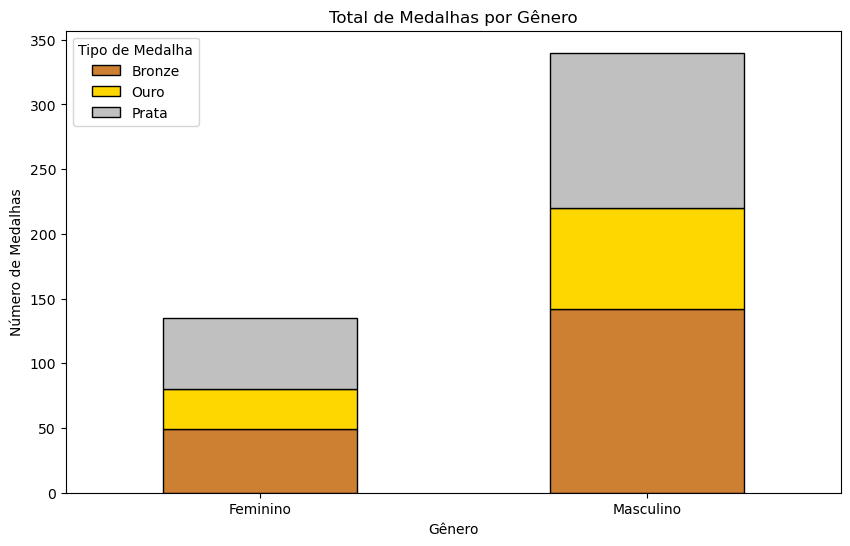

In [68]:
# Gráfico de barras
medalhas_genero_total.plot(kind='bar', stacked=True, edgecolor='black', figsize=(10,6), color=['#cd7f32', '#ffd700', '#c0c0c0'])

plt.title('Total de Medalhas por Gênero')
plt.ylabel('Número de Medalhas')
plt.xlabel('Gênero')

# Rotacionar as etiquetas do eixo x
plt.xticks(rotation=0)

# Colocando a legenda em português
plt.legend(title='Tipo de Medalha', labels=['Bronze', 'Ouro', 'Prata']);


> Como há uma maior proporção de homens nas competições, é relevante destacar a quantidade de medalhas conquistadas por eles.

### Atletas:

In [69]:
# Passo 1: Filtrar e selecionar
dados[dados.NOC == 'BRA'][['Name', 'Sport', 'Event', 'Year']]

,Name,Sport,Event,Year
665,Alexandre Abeid,Volleyball,Volleyball Men's Volleyball,1972
666,Alexandre Abeid,Volleyball,Volleyball Men's Volleyball,1976
668,Abel Carlos da Silva Braga,Football,Football Men's Football,1972
781,Diana Monteiro Abla,Water Polo,Water Polo Women's Water Polo,2016
1005,Glauclio Serro Abreu,Boxing,Boxing Men's Middleweight,2004
...,...,...,...,...
267273,"Maria Jos ""Zz"" Bertolotti",Basketball,Basketball Women's Basketball,1992
268366,Sieglinda Lenk Zigler,Swimming,Swimming Women's 100 metres Backstroke,1936
268520,Moacir Zimmermann,Athletics,Athletics Men's 20 kilometres Walk,2016
269093,Zzimo Alves Calazans,Football,Football Men's Football,1952


______

### 9. Atletas que mais participaram 

In [70]:
# Os 10 atletaas que mais participaram das competições até 20016
participacao_por_atleta = dados[dados.NOC == 'BRA'].groupby(['Name', 'Sport', 'Event', 'Year']).size().groupby(level=0).sum().reset_index(name='Participations').sort_values(by='Participations', ascending=False).head(10)

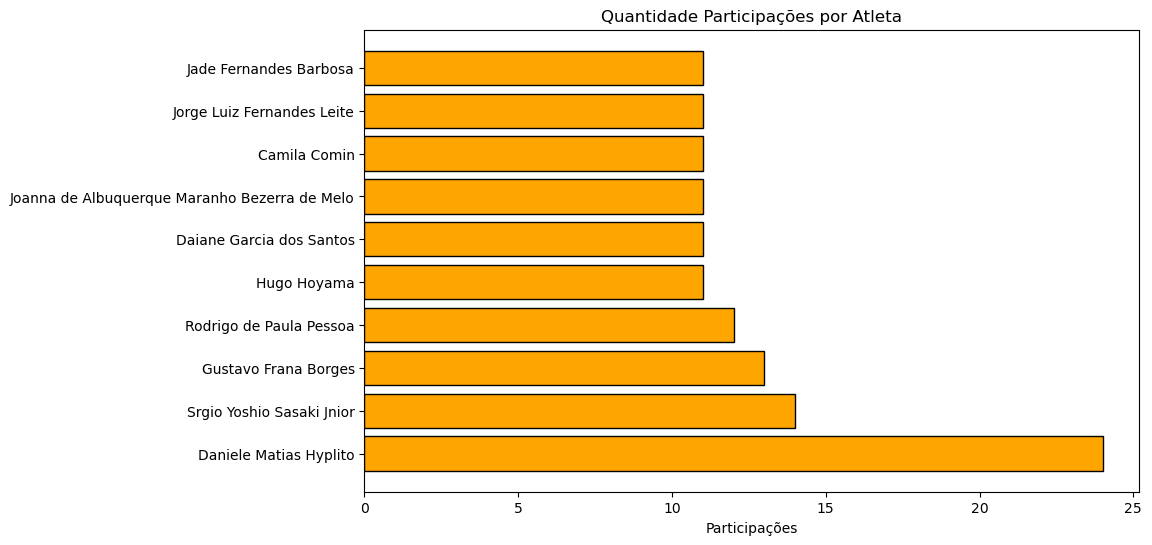

In [71]:
# Gráfico 
# Criando o gráfico de barras horizontal

plt.figure(figsize=(10, 6))
plt.barh(participacao_por_atleta['Name'], participacao_por_atleta['Participations'], edgecolor='black', color='orange')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade Participações por Atleta')
plt.xlabel('Participações');
#plt.ylabel('Atletas');

> Dentre os dez atletas que mais participaram dos Jogos Olímpicos, Daniele Matias Hypolito se destaca como uma das principais representantes.

In [72]:
participacao_por_atleta

,Name,Participations
454,Daniele Matias Hyplito,24
1853,Srgio Yoshio Sasaki Jnior,14
799,Gustavo Frana Borges,13
1720,Rodrigo de Paula Pessoa,12
867,Hugo Hoyama,11
432,Daiane Garcia dos Santos,11
951,Joanna de Albuquerque Maranho Bezerra de Melo,11
306,Camila Comin,11
1017,Jorge Luiz Fernandes Leite,11
903,Jade Fernandes Barbosa,11


______

### 10. Atletas com mais medalhas ao longo do tempo 

In [73]:
# Atletas que mais conquistaram medatalhas

df = dados[(dados.NOC == 'BRA') & (dados.Medal.notna())].groupby(['Name', 'Sport']).size().reset_index(name='Medals').sort_values(by='Medals', ascending=False).head(10)
df

,Name,Sport,Medals
283,Robert Scheidt,Sailing,5
332,Torben Schmidt Grael,Sailing,5
141,Gustavo Frana Borges,Swimming,4
316,"Srgio ""Escadinha"" Dutra dos Santos",Volleyball,4
286,"Rodrigo ""Rodrigo"" Santana",Volleyball,3
134,"Gilberto Amauri ""Giba"" de Godoy Filho",Volleyball,3
58,"Bruno ""Bruninho"" Mossa de Rezende",Volleyball,3
289,Rodrigo de Paula Pessoa,Equestrianism,3
104,Emanuel Fernando Scheffler Rego,Beach Volleyball,3
85,Dante Guimares Santos do Amaral,Volleyball,3


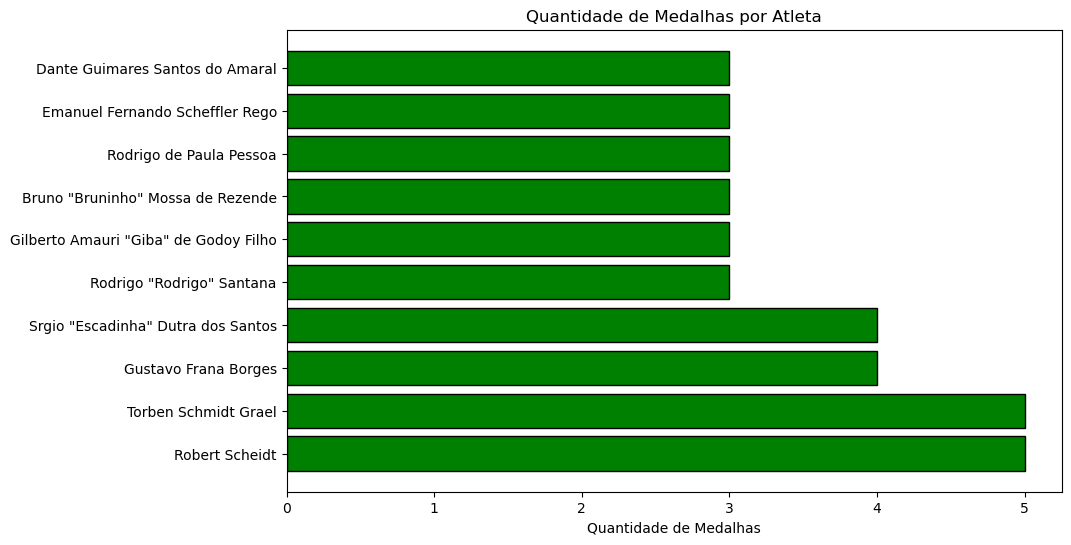

In [74]:
# Gráfico 
# Criando o gráfico de barras horizontal

plt.figure(figsize=(10, 6))
plt.barh(df['Name'], df['Medals'], edgecolor='black', color='green')

# Adicionando título e rótulos aos eixos
plt.title('Quantidade de Medalhas por Atleta')
plt.xlabel('Quantidade de Medalhas');




### 11. Atletas com mais medalhas de OURO individual longo do tempo 

In [75]:
# Filtrar dados do Brasil
dados_brasil = dados[dados['NOC'] == 'BRA']

# Identificar eventos únicos
eventos_unicos = dados_brasil['Event'].unique()

# Filtrar eventos individuais automaticamente (exemplo: se contiver "Men's" ou "Women's")
# Você pode ajustar a lógica conforme necessário
eventos_individuais = [evento for evento in eventos_unicos if 'Men' in evento or 'Women' in evento]

# Filtrar dados para eventos individuais e medalhas de ouro
dados_ouro_individuais = dados_brasil[
    (dados_brasil['Event'].isin(eventos_individuais)) & 
    (dados_brasil['Medal'] == 'Gold')
]

# Contar medalhas de ouro por atleta
atletas_ouro = dados_ouro_individuais.groupby('Name')['Medal'].count().reset_index()

# Ordenar por número de medalhas de ouro e pegar os 10 primeiros
atletas_mais_ouro = atletas_ouro.sort_values(by='Medal', ascending=False).head(10)

# Exibir os resultados
atletas_mais_ouro


,Name,Medal
23,"Fabiana ""Fabi"" Alvim de Oliveira",2
37,"Jaqueline Maria ""Jaque"" Pereira de Carvalho En...",2
31,Giovane Farinazzo Gvio,2
73,Sheilla Tavares de Castro Blassioli,2
74,"Srgio ""Escadinha"" Dutra dos Santos",2
77,Thasa Daher de Menezes,2
58,Paula Renata Marques Pequeno,2
24,Fabiana Marcelino Claudino,2
52,Maurcio Camargo Lima,2
1,Adhemar Ferreira da Silva,2


### Conclusão: 

A partir da análise descritiva do desempenho do Brasil nos Jogos Olímpicos até 2016, é possível observar uma evolução significativa nas conquistas de medalhas ao longo dos anos. O país, que historicamente conquistava poucas medalhas, passou a se destacar em várias modalidades, especialmente a partir das últimas décadas, refletindo maiores investimentos no esporte e o desenvolvimento de programas de incentivo aos atletas.

Os dados mostram que o Brasil tem tido maior sucesso em esportes coletivos, como o voleibol e o futebol, além de modalidades individuais como o judô e a vela, onde o país tem uma forte tradição. Outro aspecto importante observado é o aumento da participação de atletas femininas, com contribuições cada vez mais expressivas para o total de medalhas, refletindo o crescimento da igualdade de oportunidades no esporte.

Esse aumento constante no número de medalhas conquistadas sugere uma tendência de melhoria no desempenho do Brasil, embora o resultado final em cada edição dos Jogos Olímpicos dependa de diversos fatores, como o nível de competição global, o suporte oferecido aos atletas e a organização esportiva nacional.